## Import the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import Normalizer
%matplotlib inline
plt.style.use('fivethirtyeight')

## Load the dataset into a Pandas dataframe

In [4]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
df['dataset'].value_counts()

Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64

In [6]:
df.drop(['id','ca','thal'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  num       920 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 93.6+ KB


In [8]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [9]:
df.corr()

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.244253,-0.086234,-0.365778,0.258243,0.339596
trestbps,0.244253,1.000000,0.092853,-0.104899,0.161908,0.122291
chol,-0.086234,0.092853,1.000000,0.236121,0.047734,-0.231547
thalch,-0.365778,-0.104899,0.236121,1.000000,-0.151174,-0.366265
oldpeak,0.258243,0.161908,0.047734,-0.151174,1.000000,0.443084
num,0.339596,0.122291,-0.231547,-0.366265,0.443084,1.000000


# VISUALIZATION

<AxesSubplot:>

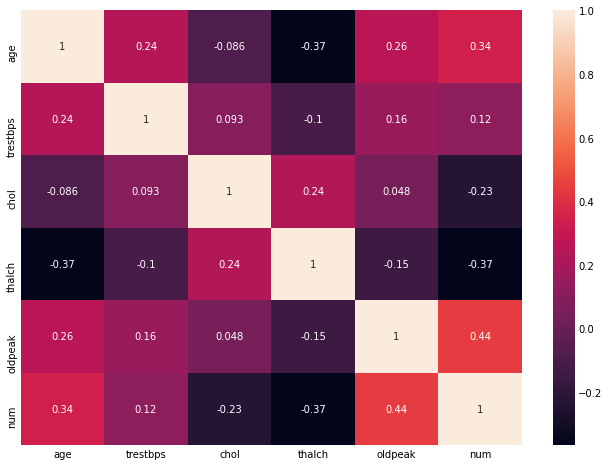

In [10]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(df.corr(), annot=True, ax=ax)

<AxesSubplot:xlabel='sex', ylabel='count'>

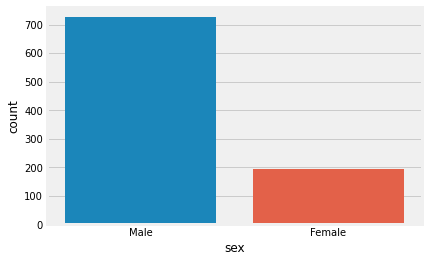

In [11]:
sns.countplot(x=df.sex)

<AxesSubplot:xlabel='dataset', ylabel='count'>

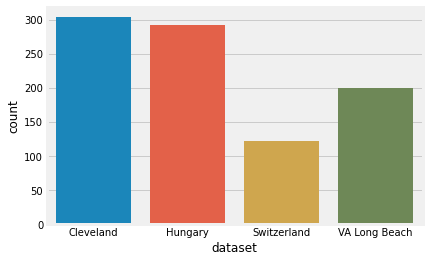

In [12]:
sns.countplot(x=df['dataset'])

<AxesSubplot:xlabel='cp', ylabel='count'>

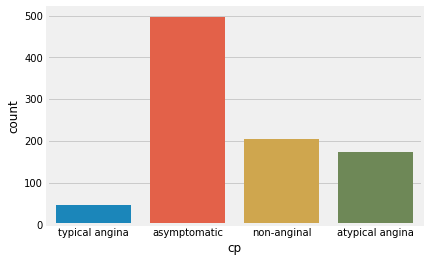

In [13]:
sns.countplot(x=df['cp'])

<AxesSubplot:xlabel='fbs', ylabel='count'>

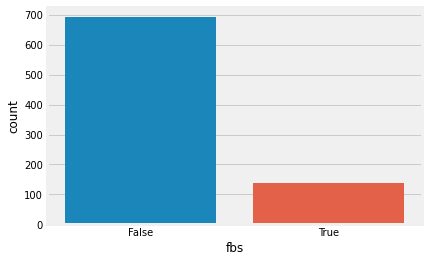

In [14]:
sns.countplot(x=df['fbs'])

<AxesSubplot:xlabel='restecg', ylabel='count'>

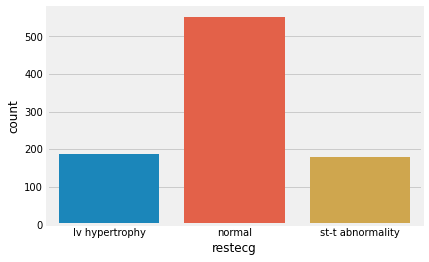

In [15]:
sns.countplot(x=df['restecg'])

In [16]:
df['restecg'].value_counts()

normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

<AxesSubplot:xlabel='exang', ylabel='count'>

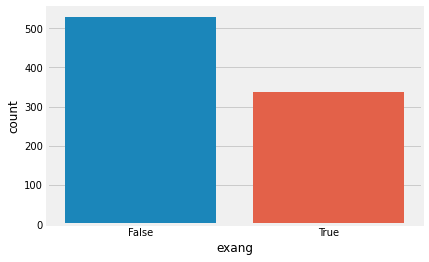

In [17]:
sns.countplot(x=df['exang'])

<AxesSubplot:xlabel='slope', ylabel='count'>

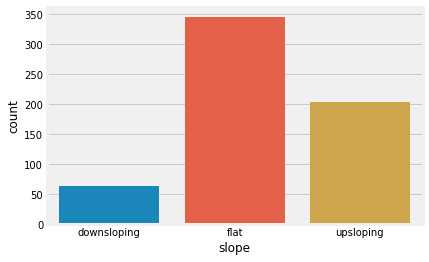

In [18]:
sns.countplot(x=df['slope'])

In [19]:
#sns.countplot(x=df['num'])

In [20]:
list(df.columns)

['age',
 'sex',
 'dataset',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'num']

# Machine Learning

In [21]:
df.dropna(inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 0 to 912
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       531 non-null    int64  
 1   sex       531 non-null    object 
 2   dataset   531 non-null    object 
 3   cp        531 non-null    object 
 4   trestbps  531 non-null    float64
 5   chol      531 non-null    float64
 6   fbs       531 non-null    object 
 7   restecg   531 non-null    object 
 8   thalch    531 non-null    float64
 9   exang     531 non-null    object 
 10  oldpeak   531 non-null    float64
 11  slope     531 non-null    object 
 12  num       531 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 58.1+ KB


In [23]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['sex']= label_encoder.fit_transform(df['sex'])
df['dataset']= label_encoder.fit_transform(df['dataset'])
df['cp']= label_encoder.fit_transform(df['cp'])
df['fbs']= label_encoder.fit_transform(df['fbs'])
df['restecg']= label_encoder.fit_transform(df['restecg'])
df['exang']= label_encoder.fit_transform(df['exang'])
df['slope']= label_encoder.fit_transform(df['slope'])

df['sex'].unique()
df['dataset'].unique()
df['cp'].unique()
df['fbs'].unique()
df['restecg'].unique()
df['exang'].unique()
df['slope'].unique()

array([0, 1, 2])

In [24]:
df.shape

(531, 13)

In [25]:
X = df.iloc[:, 0:12]
y = df.iloc[:,12]

In [26]:
X

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope
0,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0
1,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1
2,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1
3,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0
4,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
904,57,1,3,0,130.0,207.0,0,2,96.0,1,1.0,1
908,74,1,3,0,155.0,310.0,0,1,112.0,1,1.5,0
910,51,0,3,0,114.0,258.0,1,0,96.0,0,1.0,2
911,62,1,3,0,160.0,254.0,1,2,108.0,1,3.0,1


In [27]:
y

0      0
1      2
2      1
3      0
4      0
      ..
904    0
908    2
910    0
911    4
912    3
Name: num, Length: 531, dtype: int64

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Support Vector Machine

In [29]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X, y)
predictions = SVM.predict(X)
val1 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for SVM: ", val1, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y, predictions))

*Accuracy score for SVM:  48.21092278719397 

*Confusion Matrix for SVM: 
[[171  36   0   0   0]
 [ 76  85   0   0   0]
 [ 30  41   0   0   0]
 [ 23  48   0   0   0]
 [ 10  11   0   0   0]]


In [30]:
print("Classification Report for SVM: ")
print(classification_report(y, predictions))

Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.55      0.83      0.66       207
           1       0.38      0.53      0.45       161
           2       0.00      0.00      0.00        71
           3       0.00      0.00      0.00        71
           4       0.00      0.00      0.00        21

    accuracy                           0.48       531
   macro avg       0.19      0.27      0.22       531
weighted avg       0.33      0.48      0.39       531



C:\Users\manub\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# GBDT

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
base_estimator=DecisionTreeClassifier(max_depth=1,criterion='gini', splitter='best', min_samples_split=2)
model = AdaBoostClassifier(base_estimator=base_estimator,n_estimators=100)
model.fit(X, y)
predictions = model.predict(X)
print("*Confusion Matrix for GBDT: ")
print(confusion_matrix(y, predictions))
val2 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for GBDT: ", val2, "\n")
print("*Classification Report for GBDT: ")
print(classification_report(y, predictions))

*Confusion Matrix for GBDT: 
[[169  30   7   1   0]
 [ 42  88  18  11   2]
 [  8  23  30   8   2]
 [ 14  27   8  17   5]
 [  0   3   1   7  10]]
*Accuracy score for GBDT:  59.133709981167605 

*Classification Report for GBDT: 
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       207
           1       0.51      0.55      0.53       161
           2       0.47      0.42      0.44        71
           3       0.39      0.24      0.30        71
           4       0.53      0.48      0.50        21

    accuracy                           0.59       531
   macro avg       0.52      0.50      0.51       531
weighted avg       0.57      0.59      0.58       531



# Bagging + GBDT

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=42)#meta estimator
eclf1 = VotingClassifier(estimators=[('bagging', clf1), ('gbdt', model)], voting='hard')
eclf1.fit(X, y)
predictions = eclf1.predict(X)
print("*Confusion Matrix for Bagging + GBDT: ")
print(confusion_matrix(y, predictions))

*Confusion Matrix for Bagging + GBDT: 
[[207   0   0   0   0]
 [ 42 119   0   0   0]
 [  8  23  40   0   0]
 [ 14  27   8  22   0]
 [  0   3   1   7  10]]


In [33]:
val3 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for Bagging + GBDT: ", val3, "\n")
print("*Classification Report for Bagging + GBDT: ")
print(classification_report(y, predictions))

*Accuracy score for Bagging + GBDT:  74.95291902071564 

*Classification Report for Bagging + GBDT: 
              precision    recall  f1-score   support

           0       0.76      1.00      0.87       207
           1       0.69      0.74      0.71       161
           2       0.82      0.56      0.67        71
           3       0.76      0.31      0.44        71
           4       1.00      0.48      0.65        21

    accuracy                           0.75       531
   macro avg       0.81      0.62      0.67       531
weighted avg       0.76      0.75      0.73       531



# Fuzzy + GBDT

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
clf2 = GradientBoostingClassifier(n_estimators=100, random_state=42)
eclf1 = VotingClassifier(estimators=[('fuzzy', clf2), ('gbdt', model)], voting='hard')
eclf1.fit(X, y)
predictions = eclf1.predict(X)
print("*Confusion Matrix for Fuzzy + GBDT: ")
print(confusion_matrix(y, predictions))
val4 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for Fuzzy + GBDT: ", val4, "\n")
print("*Classification Report for Fuzzy + GBDT: ")
print(classification_report(y, predictions))

*Confusion Matrix for Fuzzy + GBDT: 
[[202   5   0   0   0]
 [ 43 114   4   0   0]
 [  9  22  39   1   0]
 [ 15  26   8  22   0]
 [  0   3   1   7  10]]
*Accuracy score for Fuzzy + GBDT:  72.88135593220339 

*Classification Report for Fuzzy + GBDT: 
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       207
           1       0.67      0.71      0.69       161
           2       0.75      0.55      0.63        71
           3       0.73      0.31      0.44        71
           4       1.00      0.48      0.65        21

    accuracy                           0.73       531
   macro avg       0.78      0.60      0.65       531
weighted avg       0.73      0.73      0.71       531



# Bagging + Fuzzy + GBDT

In [35]:
eclf1 = VotingClassifier(estimators=[('bagging', clf1),('fuzzy', clf2), ('gbdt', model)], voting='hard')
eclf1.fit(X, y)
predictions = eclf1.predict(X)
print("*Confusion Matrix for Bagging + Fuzzy + GBDT: ")
print(confusion_matrix(y, predictions))
val5 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for Bagging + Fuzzy + GBDT: ", val5, "\n")
print("*Classification Report for Bagging + Fuzzy + GBDT: ")
print(classification_report(y, predictions))

*Confusion Matrix for Bagging + Fuzzy + GBDT: 
[[202   5   0   0   0]
 [  8 149   4   0   0]
 [  2   1  67   1   0]
 [  4   0   0  67   0]
 [  0   0   0   0  21]]
*Accuracy score for Bagging + Fuzzy + GBDT:  95.29190207156309 

*Classification Report for Bagging + Fuzzy + GBDT: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       207
           1       0.96      0.93      0.94       161
           2       0.94      0.94      0.94        71
           3       0.99      0.94      0.96        71
           4       1.00      1.00      1.00        21

    accuracy                           0.95       531
   macro avg       0.97      0.96      0.96       531
weighted avg       0.95      0.95      0.95       531



# Voting Classifier

In [36]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = SVC(gamma='auto')
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = DecisionTreeClassifier()
vot = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
vot.fit(X, y)
predictions = vot.predict(X)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y, predictions))

*Confusion Matrix for Voting Classifier: 
[[207   0   0   0   0]
 [  0 161   0   0   0]
 [  0   0  71   0   0]
 [  0   0   0  71   0]
 [  0   0   0   0  21]]


In [37]:
val6 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for Voting: ", val6, "\n")

*Accuracy score for Voting:  100.0 



# Accuracy Comparison

In [38]:
score = [val1,val2,val3,val4, val5,val6]

In [39]:
#make variabel for save the result and to show it
classifier = ('SVM','GBDT','Bagging+GBDT','Fuzzy+GBDT','Bagging+Fuzzy+GBDT','voting')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5]
[48.21092278719397, 59.133709981167605, 74.95291902071564, 72.88135593220339, 95.29190207156309, 100.0]


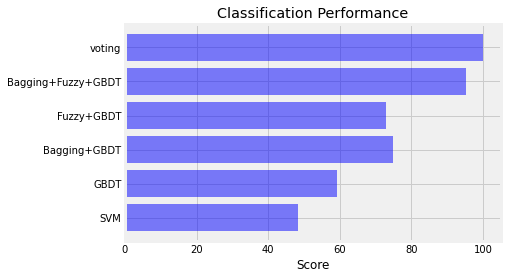

In [40]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

# PIPELINING

In [41]:
import joblib
filename = 'model.sav'
joblib.dump(vot, filename)

['model.sav']